# Modèle Linéaire : Classification

### Importation de la lib :

In [1]:
from interoperability.python_interlop.wrapper import MyModel
import numpy as np

## Linear simple :

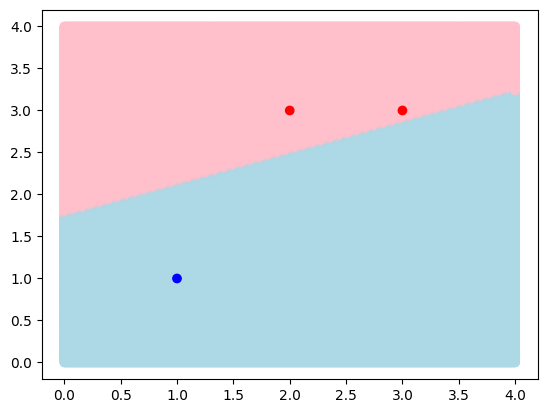

In [2]:
X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([
    1,
    -1,
    -1
])

model = MyModel("ml", 2)

model.train(X, Y, 0.001, 1_000_000)

model.print_predictions(4, 4, 0.01)